In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datasets/train.csv')

In [3]:
data.shape

(42000, 785)

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train = data.values[:, 1:]
y_train = data.values[:, :1].ravel()

In [6]:
X_train.shape, y_train.shape

((42000, 784), (42000,))

In [142]:
def show_digit(data):
    img = data.reshape((28, 28))
    plt.imshow(img)
plt.show()

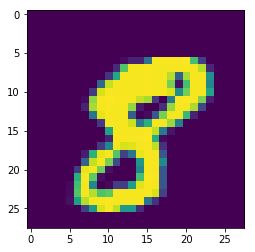

In [143]:
show_digit(X_train[10])

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    { 'n_estimators': [800, 1000, 1200], 'max_depth': [15], 'max_features': [28], 'n_jobs': [-1] }
]

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, verbose=1)
grid.fit(X_train[:1000], y_train[:1000])
grid.best_score_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   11.3s finished


0.881

In [70]:
grid.best_params_

{'max_depth': 15, 'max_features': 28, 'n_estimators': 800, 'n_jobs': -1}

In [71]:
from sklearn.base import clone
forest_clf = clone(grid.best_estimator_)

In [72]:
forest_clf.fit(X_train[:10000], y_train[:10000])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=28, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [73]:
print("Score on train set: {:.2f}".format(forest_clf.score(X_train[10000:], y_train[10000:])))

Score on train set: 0.95


In [74]:
# train on all available data
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=28, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [123]:
y_train_pred = forest_clf.predict(X_train)

In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4132
           1       1.00      1.00      1.00      4684
           2       1.00      1.00      1.00      4177
           3       1.00      1.00      1.00      4351
           4       1.00      1.00      1.00      4072
           5       1.00      1.00      1.00      3795
           6       1.00      1.00      1.00      4137
           7       0.99      1.00      1.00      4401
           8       1.00      1.00      1.00      4063
           9       0.99      1.00      0.99      4188

   micro avg       1.00      1.00      1.00     42000
   macro avg       1.00      1.00      1.00     42000
weighted avg       1.00      1.00      1.00     42000



In [125]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[4132,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 4682,    0,    0,    0,    0,    0,    1,    0,    1],
       [   0,    1, 4165,    0,    1,    0,    0,    9,    1,    0],
       [   0,    1,    0, 4338,    0,    0,    0,    6,    1,    5],
       [   0,    1,    0,    0, 4056,    0,    1,    1,    0,   13],
       [   0,    0,    0,    0,    0, 3794,    1,    0,    0,    0],
       [   0,    2,    0,    0,    1,    0, 4134,    0,    0,    0],
       [   0,    4,    1,    0,    0,    0,    0, 4392,    0,    4],
       [   0,    8,    0,    0,    0,    0,    0,    0, 4051,    4],
       [   1,    1,    0,    0,    3,    0,    0,   12,    0, 4171]])

In [136]:
def show_confusion_matrix(cm):
    row_sums = cm.sum(axis=1, keepdims=True)
    norm_conf_mx = cm / row_sums
    np.fill_diagonal(norm_conf_mx, 0)

    plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
    plt.show()

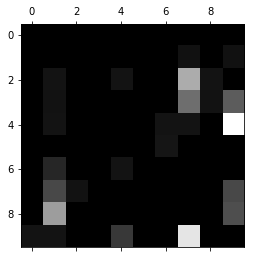

In [137]:
show_confusion_matrix(conf_mx)

### N.B.

Most errors are 4 being misclassified as 9 as well as 9 misclassified as 7.

In [128]:
X_train_4_9 = X_train[(y_train == 4) & (y_train_pred == 9)]
X_train_9_7 = X_train[(y_train == 9) & (y_train_pred == 7)]

len(X_train_4_9), len(X_train_9_7)

(13, 12)

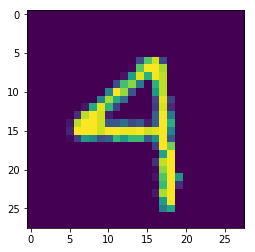

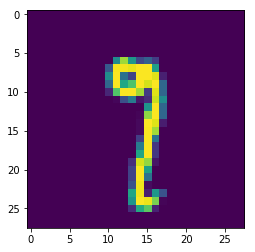

In [146]:
show_digit(X_train_4_9[0])
plt.show()

show_digit(X_train_9_7[0])
plt.show()

In [171]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(max_depth=5, max_features=28, n_estimators=800, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=28, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=800,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [172]:
y_train_pred = gb_clf.predict(X_train)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[4132,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 4684,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 4177,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 4351,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 4072,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 3795,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 4137,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 4401,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 4063,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 4188]])

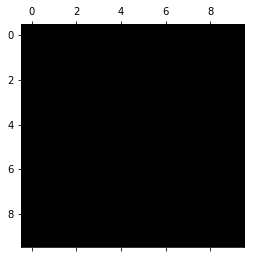

In [173]:
show_confusion_matrix(conf_mx)

In [174]:
X_test = pd.read_csv('datasets/test.csv').values

In [175]:
y_pred = gb_clf.predict(X_test)

In [176]:
indices = np.indices(y_pred.shape)[0] + 1
indices.shape, y_pred.shape

((28000,), (28000,))

In [177]:
submission = pd.DataFrame(data=np.c_[indices, y_pred], columns=['ImageId', 'Label'])

In [187]:
submission.head(n=5)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


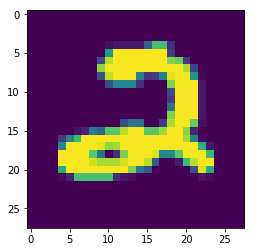

In [186]:
show_digit(X_test[0])

In [188]:
submission.to_csv('results/submission.csv', index=False)